# `DGLGraph` and node/edge features

## imports

In [7]:
import torch
import dgl

import numpy as np
import scipy.sparse as spp
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


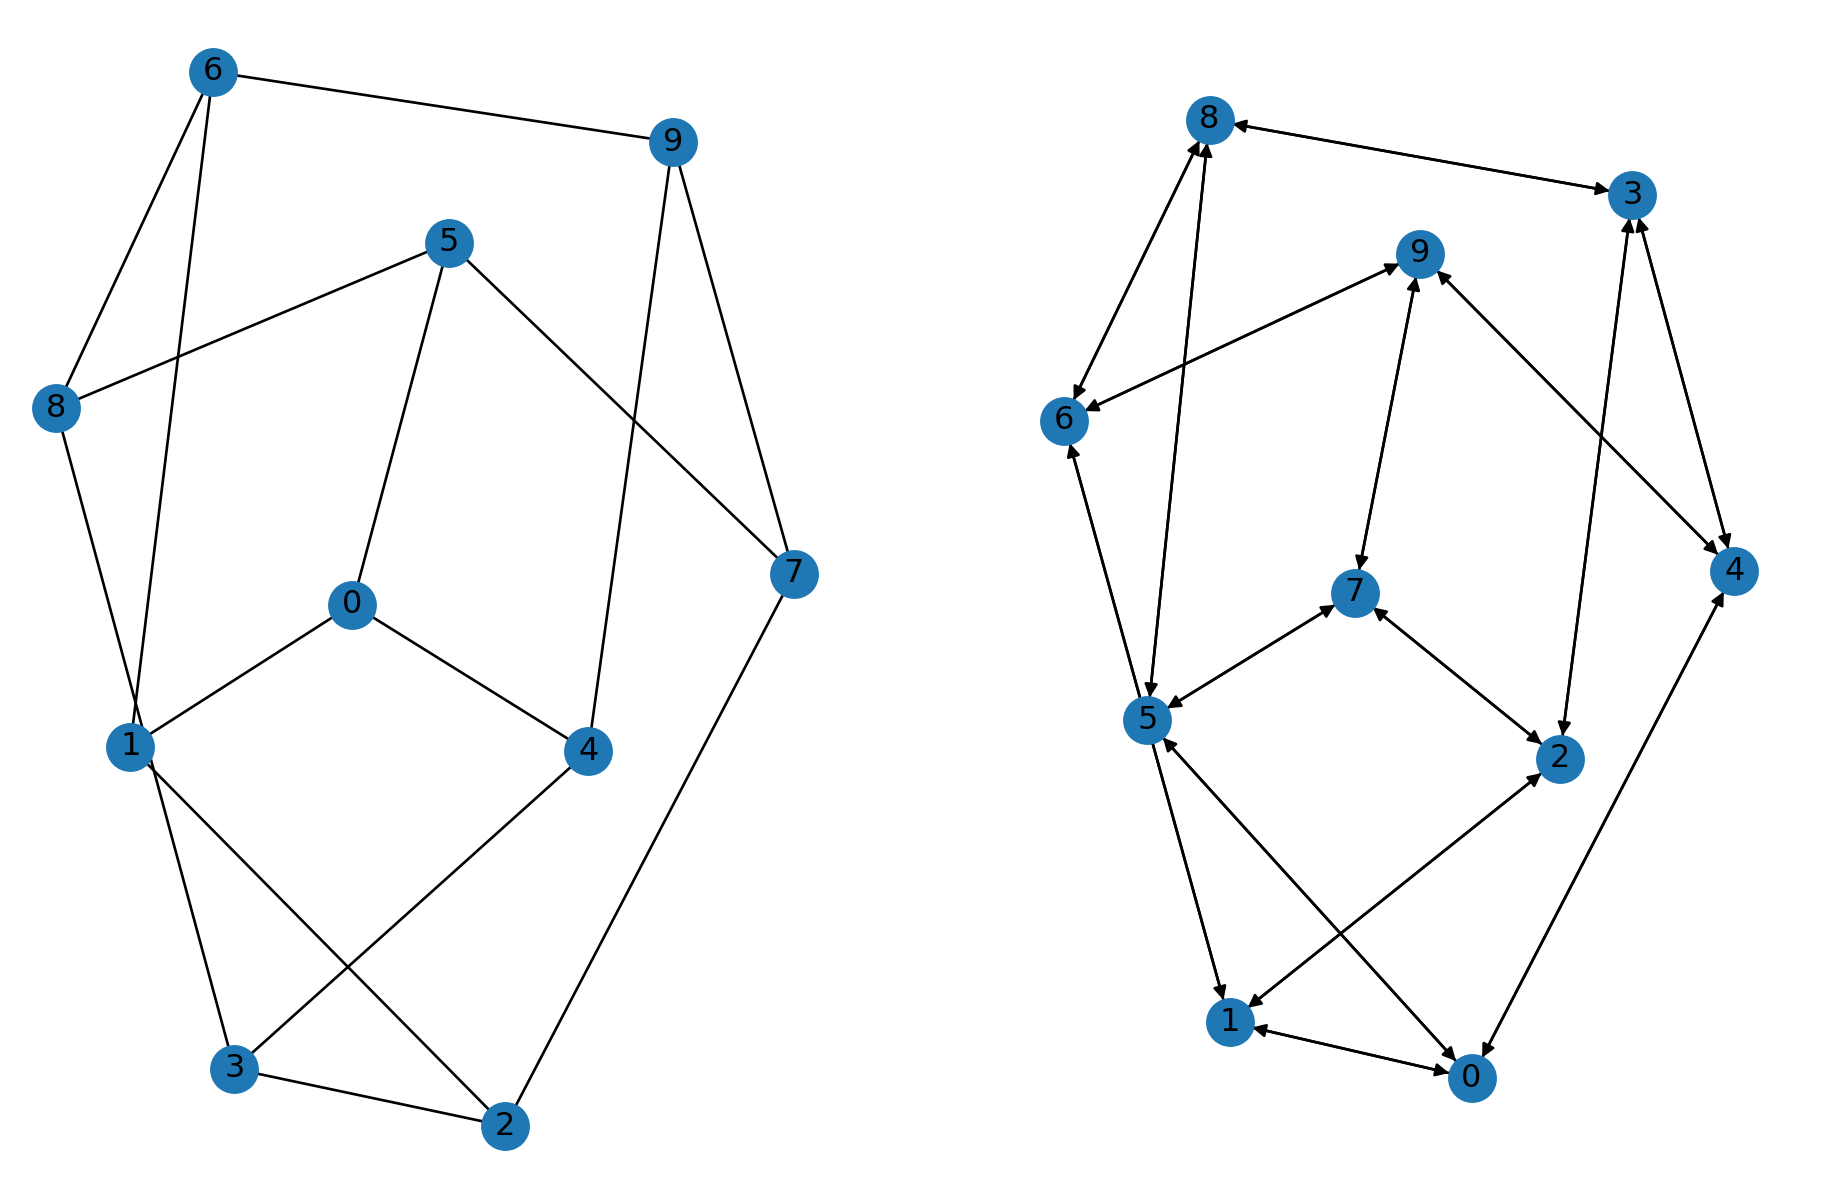

In [6]:
plt.figure(figsize=(12, 8), dpi=192)
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

In [8]:
# create a star graph via torch tensors
u = torch.tensor([0, 0, 0, 0, 0])
v = torch.tensor([1, 2, 3, 4, 5])

star1 = dgl.DGLGraph((u, v))

# create the same star graph from a coo_matrix
adj = spp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
star3 = dgl.DGLGraph(adj)

## iteratively building a graph

In [12]:
g = dgl.DGLGraph()

# add 10 nodes
g.add_nodes(10)

# edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)

# src/dst lists
src = list(range(5, 8))
dst = [0] * 3
g.add_edges(src, dst)

# src/dst tensors
src = torch.tensor([8, 9])
dst = torch.tensor([0, 0])
g.add_edges(src, dst)

In [13]:
g

Graph(num_nodes=10, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

In [15]:
# edge broadcasting!
g = dgl.DGLGraph()

# add 10 nodes
g.add_nodes(10)

# edge broadcasting
src = torch.tensor(list(range(1, 10)))
g.add_edges(src, 0)

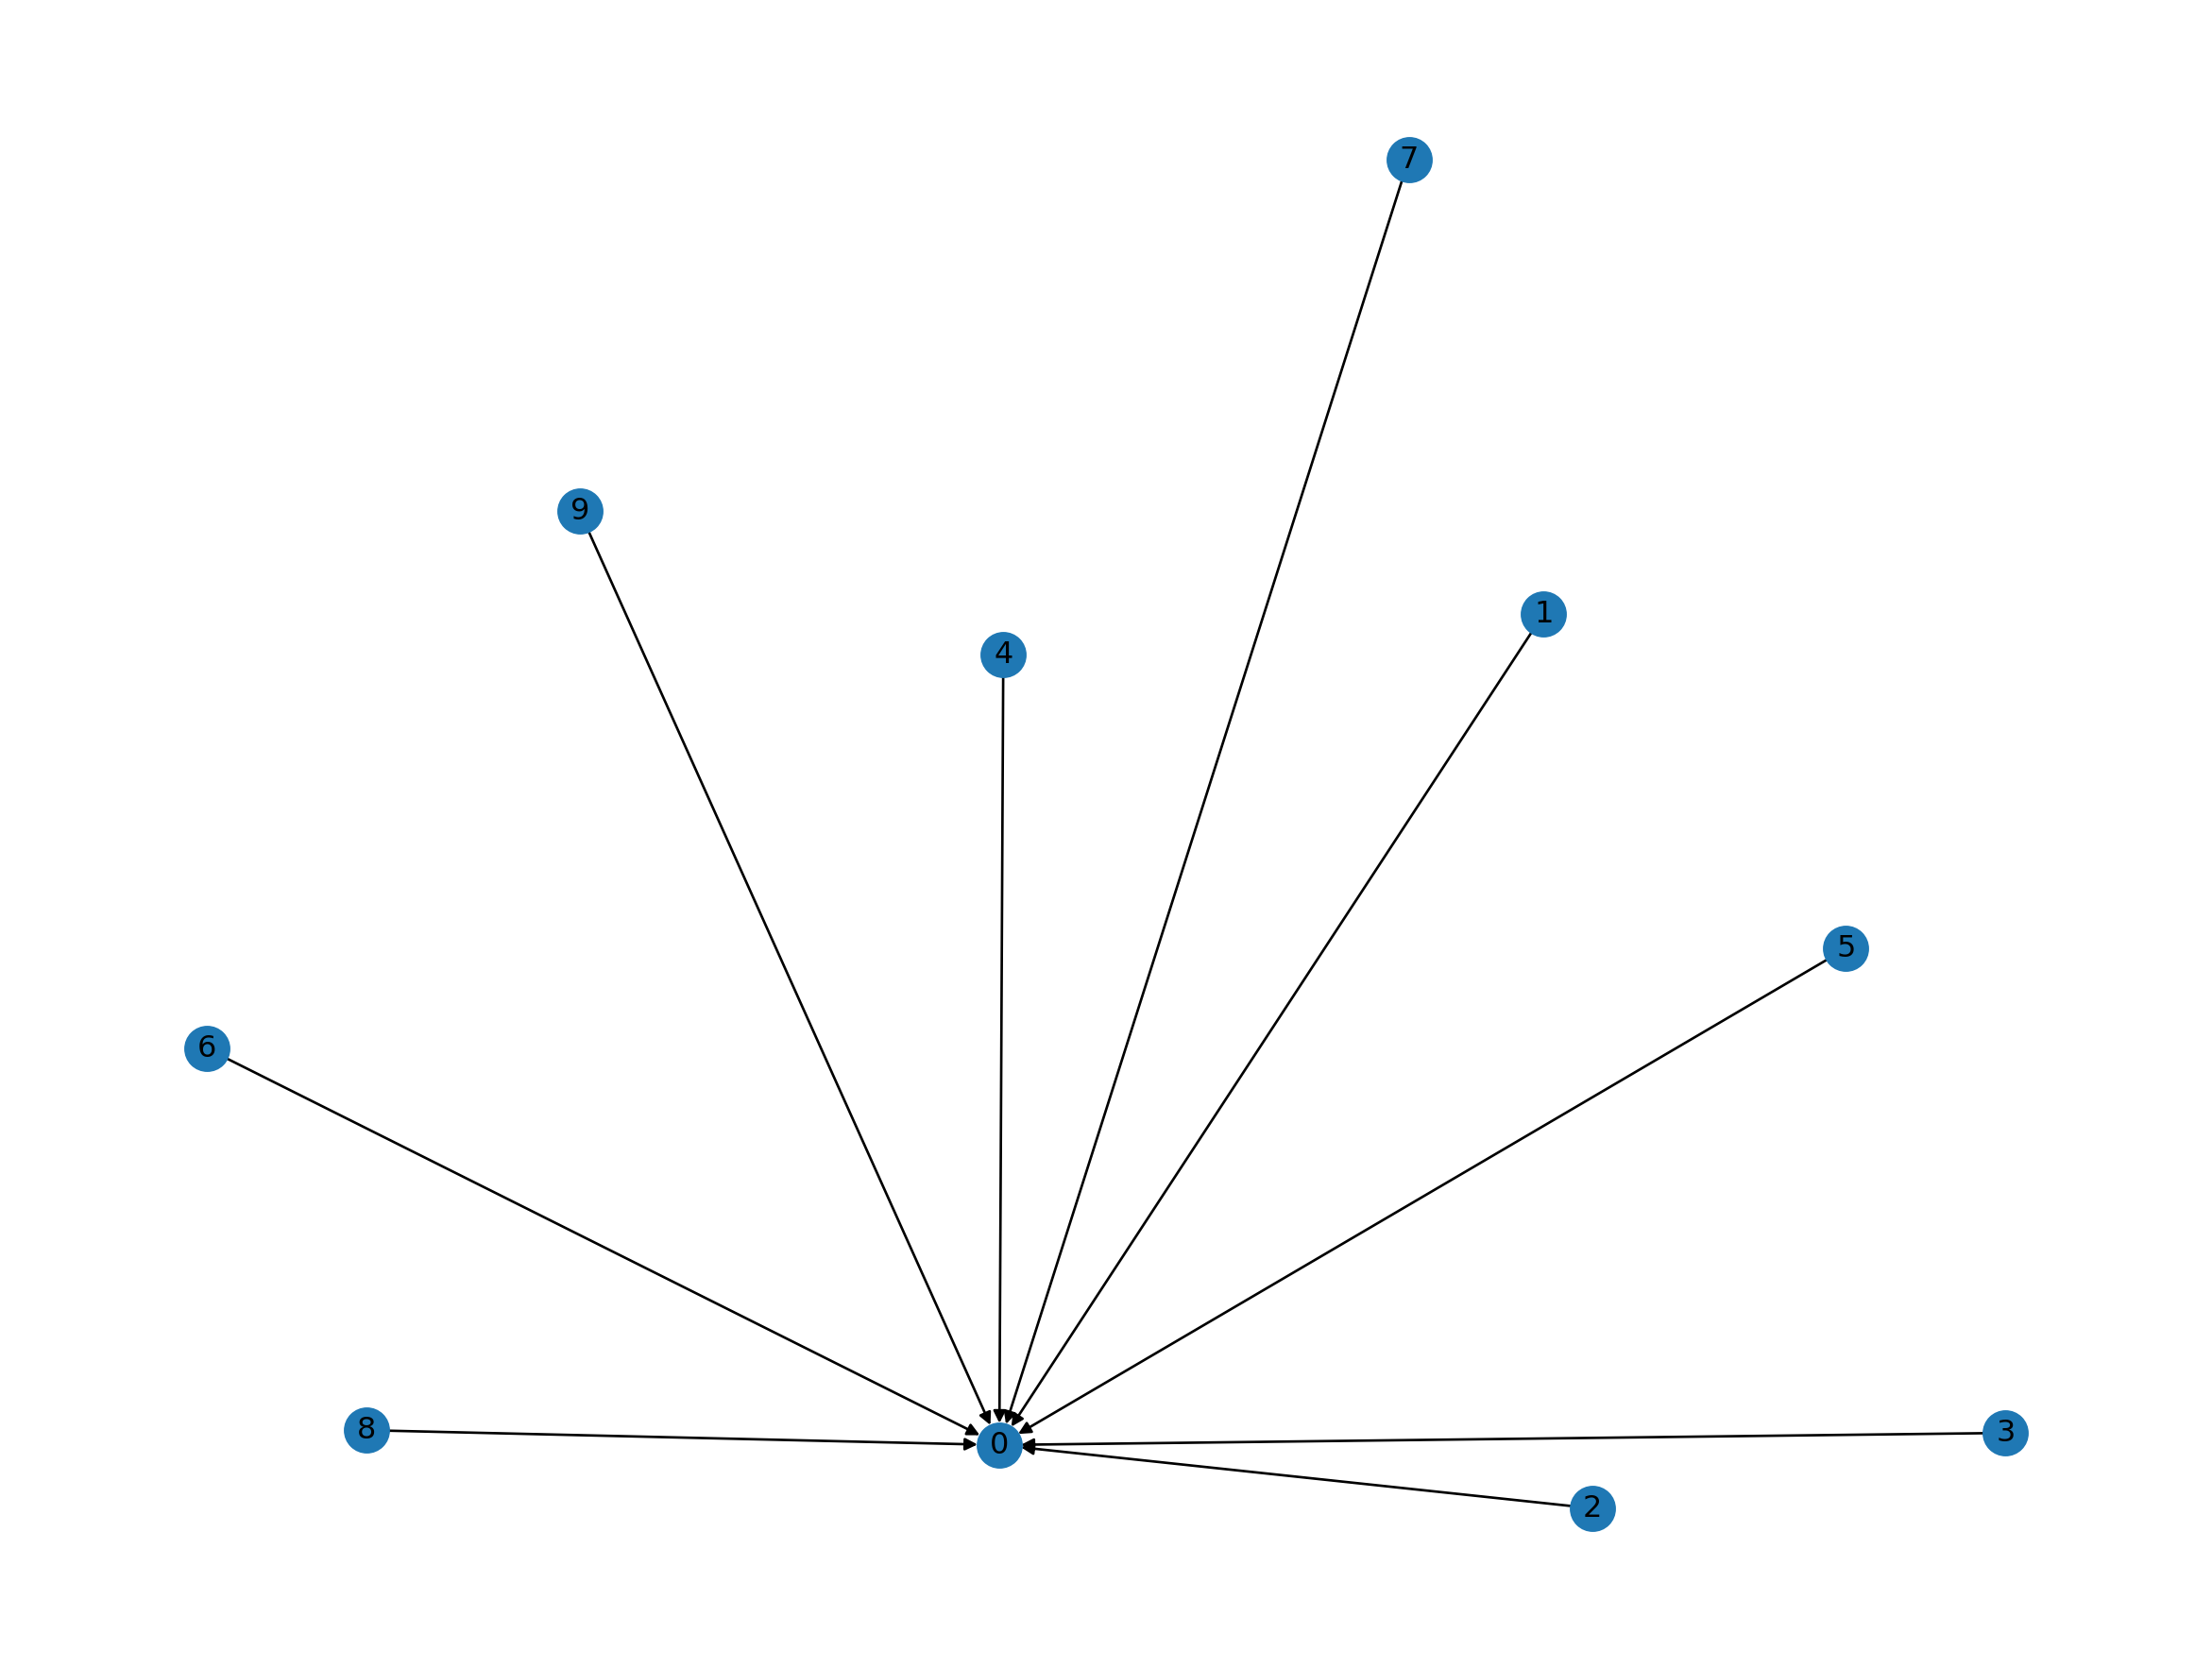

In [17]:
plt.figure(figsize=(12, 9), dpi=192)
nx.draw(g.to_networkx(), with_labels=True)

## node features

In [18]:
# each node has a 3-dimensional feature vector
x = torch.randn(10, 3)
g.ndata['x'] = x

In [23]:
g.ndata['x'][0] = torch.zeros(1, 3)

In [25]:
g.ndata['x'][[0, 1, 2]] = torch.zeros(3, 3)

In [27]:
g.ndata['x'][torch.tensor([0, 1, 2])] = torch.randn((3, 3))

In [28]:
g.ndata['x']

tensor([[ 2.1577, -0.4778, -0.6985],
        [ 0.7189,  0.3618,  0.4505],
        [ 1.0611,  1.3250, -0.9516],
        [-1.1335, -2.2213,  0.5508],
        [ 1.1338,  1.6405,  2.1946],
        [-0.0879,  0.0754,  0.6913],
        [-0.0293, -0.9157,  0.3237],
        [-0.1852, -1.8609,  0.4967],
        [-0.3080,  0.3437,  1.3208],
        [-0.4271, -0.7429,  1.2466]])

## edge features

In [29]:
g.edata['w'] = torch.randn(9, 2)

In [30]:
g.edata['w'][1] = torch.randn(1, 2)

In [35]:
g.edata['w'][g.edge_id(1, 0)] = torch.ones(1, 2)

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: DGLGraph.edge_id is deprecated. Please use DGLGraph.edge_ids.
  return warnings.warn(message, category=category, stacklevel=1)


In [36]:
g.edata

{'w': tensor([[ 1.0000,  1.0000],
        [ 0.0936, -0.2237],
        [-0.3008,  0.6869],
        [-1.8319,  0.0751],
        [-0.3095, -0.0922],
        [ 0.3652, -0.6332],
        [ 0.6650,  0.8641],
        [ 0.3188,  1.8209],
        [-1.1841,  1.0241]])}

In [38]:
print(g.node_attr_schemes())
print(g.edge_attr_schemes())

{'x': Scheme(shape=(3,), dtype=torch.float32)}
{'w': Scheme(shape=(2,), dtype=torch.float32)}


## multigraphs

In [39]:
g_multi = dgl.DGLGraph()
g_multi.add_nodes(10)
g_multi.ndata['x'] = torch.randn(10, 2)

# two 1->0 edges
g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0)

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)
/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: DGLGraph.add_edge is deprecated. Please use DGLGraph.add_edges
  return warnings.warn(message, category=category, stacklevel=1)


In [44]:
g_multi.edata['w'] = torch.randn(10, 2)
g_multi.edges[1].data['w'] = torch.zeros(1, 2)

In [46]:
g_multi.edata

{'w': tensor([[-0.8223,  0.3874],
        [ 0.0000,  0.0000],
        [ 0.8809,  0.4329],
        [ 1.3254, -1.1557],
        [ 1.2834,  1.0942],
        [-0.1808, -0.5635],
        [ 0.6825, -0.6897],
        [ 0.1735,  0.2176],
        [-0.8557,  0.2921],
        [ 1.0905, -0.2207]])}

In [51]:
, _, eids = g_multi.edge_id(1, 0, return_uv=True)

In [48]:
a

tensor([1, 1])

tensor([0, 0])

In [50]:
eids

tensor([0, 9])